In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [67]:
train_data = pd.read_csv('Kaggle_titanic_data/train.csv')
test_data = pd.read_csv('Kaggle_titanic_data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# to find the totall mising values
def get_missing_values(df,columns):
    dict_ = {}
    data_len = len(df)
    for column in columns:
        train_column_value = df[column].value_counts().sum()
        dict_[column] = data_len - train_column_value
    return dict_
get_missing_values(train_data, columns = train_data.columns)

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [69]:
# Will not use the entire data directly,instead , I will be copying every column separetly into these dataframes for M.L models
df_cont = pd.DataFrame()
df_bin = pd.DataFrame()

0    549
1    342
Name: Survived, dtype: int64


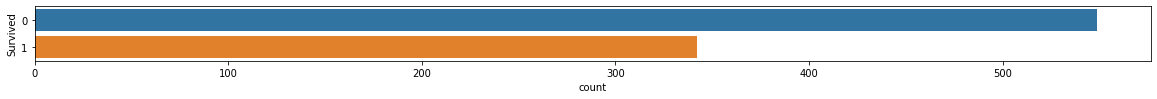

In [70]:
#Plot the people who did or didnot survived 
fig = plt.figure(figsize = (20,1))
sns.countplot(y = 'Survived' , data = train_data)
print(train_data.Survived.value_counts())

In [71]:
df_cont['Survived'] = train_data['Survived']
df_bin['Survived'] = train_data['Survived']

In [72]:
df_cont['Pclass'] = train_data['Pclass']
df_bin['Pclass'] = train_data['Pclass']

In [73]:
# Convert 'male' and 'female' to 1 or 0
# 1==>Male , 0==>female
df_bin['Sex'] = train_data['Sex']

df_bin['Sex'] = np.where(df_bin['Sex'] == 'male' ,1,0)

df_cont['Sex'] = train_data['Sex']
df_bin.head(10)

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1
5,0,3,1
6,0,1,1
7,0,3,1
8,1,3,0
9,1,2,0


In [74]:
train_data['Age'] = train_data['Age'].fillna((train_data['Age'].mean()))

In [75]:
train_data['Parch'].isnull().sum()

0

In [76]:
#Alternatively with our function
get_missing_values(train_data , columns = train_data.columns)

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 0,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [77]:
df_bin['SibSp'] = train_data['SibSp']
df_cont['SibSp'] = train_data['SibSp']

In [78]:
df_bin['Parch'] = train_data['Parch']
df_cont['Parch'] = train_data['Parch']

In [79]:
df_cont['Fare'] = train_data['Fare']
df_bin['Fare'] = pd.cut(train_data['Fare'] , 5)#Chopped a list of fares into small chunks

In [80]:
# The embarked cannot be replaced by any alphabet because it will be a bit bias, 
#therefore , we will drop the specific row and, ofcourse the number of missing values is 2 out 891(2/891)
df_cont['Embarked'] = train_data['Embarked']
df_bin['Embarked'] = train_data['Embarked']

df_cont = df_cont.dropna(subset = ['Embarked'])
df_bin = df_bin.dropna(subset = ['Embarked'])
df_bin.head(90)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,"(-0.512, 102.466]",S
1,1,1,0,1,0,"(-0.512, 102.466]",C
2,1,3,0,0,0,"(-0.512, 102.466]",S
3,1,1,0,1,0,"(-0.512, 102.466]",S
4,0,3,1,0,0,"(-0.512, 102.466]",S
...,...,...,...,...,...,...,...
86,0,3,1,1,3,"(-0.512, 102.466]",S
87,0,3,1,0,0,"(-0.512, 102.466]",S
88,1,1,0,3,2,"(204.932, 307.398]",S
89,0,3,1,0,0,"(-0.512, 102.466]",S


### Here our E.D.A ends

# Feature Encoding 

In [81]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin , columns = one_hot_cols)

In [82]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [83]:
df_cont.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [84]:
# To encode the columns, we use oneHotEncoder ;  only sex , Embarked and Pclass columns
df_Embarked_one_hot_encode = pd.get_dummies(df_cont['Embarked'] , prefix = 'embarked')

df_Sex_one_hot_encode = pd.get_dummies(df_cont['Sex'] , prefix = 'sex')

df_Pclass_one_hot_encode = pd.get_dummies(df_cont['Pclass'] , prefix = 'pclass')

In [85]:
columns_df_list = [df_cont , df_Embarked_one_hot_encode , df_Sex_one_hot_encode , df_Pclass_one_hot_encode]
df_cont_encoded = pd.concat(columns_df_list , axis = 1)
df_cont_encoded.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,male,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1,1,0,1,0,0
4,0,3,male,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [86]:
# Drop the original categorical columns (because now they've been one hot encoded)
df_cont_encoded = df_cont_encoded.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [87]:
df_cont_encoded.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [88]:
df_cont.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


## Now, let's prepare the machine learning model

In [89]:
selected_df = df_cont_encoded
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [90]:
x = np.array(selected_df.drop('Survived' , axis = 1))
y = np.array(selected_df.Survived)

In [91]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3)
log_reg_clf = linear_model.LogisticRegression(C = 1e5)
log_reg_clf.fit(x_train , y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
prediction = np.array(log_reg_clf.predict(x_test))
y_test_array = np.array(y_test)

In [102]:
for x in range(len(prediction)):
    print('Actual value:' , y_train[x] , ' , Predicted Value:' , prediction[x])

Actual value: 1  , Predicted Value: 1
Actual value: 1  , Predicted Value: 1
Actual value: 0  , Predicted Value: 1
Actual value: 0  , Predicted Value: 0
Actual value: 0  , Predicted Value: 0
Actual value: 1  , Predicted Value: 1
Actual value: 1  , Predicted Value: 1
Actual value: 0  , Predicted Value: 1
Actual value: 1  , Predicted Value: 0
Actual value: 0  , Predicted Value: 0
Actual value: 0  , Predicted Value: 0
Actual value: 0  , Predicted Value: 0
Actual value: 1  , Predicted Value: 0
Actual value: 0  , Predicted Value: 0
Actual value: 0  , Predicted Value: 0
Actual value: 0  , Predicted Value: 1
Actual value: 0  , Predicted Value: 0
Actual value: 0  , Predicted Value: 1
Actual value: 1  , Predicted Value: 0
Actual value: 1  , Predicted Value: 0
Actual value: 0  , Predicted Value: 0
Actual value: 1  , Predicted Value: 0
Actual value: 1  , Predicted Value: 0
Actual value: 1  , Predicted Value: 1
Actual value: 0  , Predicted Value: 1
Actual value: 0  , Predicted Value: 0
Actual value

In [103]:
print(accuracy_score(y_test_array , prediction)*100)

79.02621722846442


# Submission on the basis test_data

In [95]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
# As we have one_hot_encoded the categorical features of training data
# Same we will do here
enc_test_embarked = pd.get_dummies(test_data['Embarked'], 
                                       prefix='embarked')

enc_test_sex = pd.get_dummies(test_data['Sex'], 
                                prefix='sex')

enc_test_plcass = pd.get_dummies(test_data['Pclass'], 
                                   prefix='pclass')

In [97]:
test_data = pd.concat([test_data, 
                  enc_test_embarked, 
                  enc_test_sex, 
                  enc_test_plcass], axis=1)

In [111]:
# Now , we need those columns on which we have trained our machine learning algorithm
cols = ['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3']
# I lately discovered that Fare had 1 nan therefore I replaced it with the median
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# These were the columns that were used
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [113]:
final_predictions = log_reg_clf.predict(test_data[cols])

In [114]:
# Now, we will make a .CSV file to save our data
submission = pd.DataFrame()
# we need only two things in our file PassengerId and [Survived/Not-survived(1-0)]
submission['PassengerId'] = test_data['PassengerId']
submission['Survived'] = final_predictions

In [119]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [126]:
# This is how our submission file should look and the dtypes must be int
sample_submit_df = pd.read_csv('Kaggle_titanic_data/gender_submission.csv')
sample_submit_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [121]:
# We'll make it !!!!
submission['Survived'] = submission['Survived'].astype(int)

In [130]:
if(len(submission) == len(test_data)):
    print('The test_data and submission is of same length:', len(submission))
else:
    print('Sorry Boi')

The test_data and submission is of same length: 418


In [134]:
# Now we will make a csv file named submission_data.csv
submission.to_csv('Kaggle_titanic_data/submission_df.csv' , index = False)

In [135]:
check = pd.read_csv('Kaggle_titanic_data/submission_df.csv')
check

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
